In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../featured_threshold.csv')
df

,DATA_012,DATA_611,DATA_010,DATA_316,DATA_415,DATA_516,DATA_114,DATA_610,DATA_011,DATA_615,DATA_19,DATA_116,DATA_016,DATA_211,DATA_014,DATA_416,DATA_013,specific_class
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408214,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,5
1408215,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,5
1408216,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,5
1408217,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,5


In [5]:
df = df.drop(columns=[col for col in df.columns if 'ID' in col or col in ['label', 'category']])
df

,DATA_012,DATA_611,DATA_010,DATA_316,DATA_415,DATA_516,DATA_114,DATA_610,DATA_011,DATA_615,DATA_19,DATA_116,DATA_016,DATA_211,DATA_014,DATA_416,DATA_013,specific_class
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408214,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,5
1408215,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,5
1408216,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,5
1408217,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,5


In [6]:
label_encoder = LabelEncoder()
df['specific_class'] = label_encoder.fit_transform(df['specific_class'])
df['specific_class']

0          0
1          0
2          0
3          0
4          0
          ..
1408214    5
1408215    5
1408216    5
1408217    5
1408218    5
Name: specific_class, Length: 1408219, dtype: int64

In [7]:
X = df.drop(columns=['specific_class'])
y = df['specific_class']
y.value_counts()

specific_class
0    1223737
1      74663
3      54900
4      24951
5      19977
2       9991
Name: count, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_split = 2, min_samples_leaf = 1,
min_weight_fraction_leaf = 0.0, max_features = 'sqrt', min_impurity_decrease = 0.0,
bootstrap = True, oob_score = False, warm_start = False, ccp_alpha = 0.0)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [11]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9929651143523975
F1 Score: 0.9924447680254501
Precision: 0.9935476281432631
Recall: 0.9929651143523975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    367234
           1       1.00      1.00      1.00     22472
           2       1.00      0.50      0.66      2977
           3       1.00      0.91      0.95     16388
           4       0.84      1.00      0.91      7491
           5       1.00      1.00      1.00      5904

    accuracy                           0.99    422466
   macro avg       0.97      0.90      0.92    422466
weighted avg       0.99      0.99      0.99    422466


Confusion Matrix:
 [[367234      0      0      0      0      0]
 [     2  22470      0      0      0      0]
 [  1499      0   1478      0      0      0]
 [     4      0      0  14918   1466      0]
 [     0      0      0      0   7491      0]
 [     1      0      0      0      0   5903]]


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation - Random Forest
rf_cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
print("=== Cross-Validation - Random Forest ===")
print("CV Accuracy Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())

=== Cross-Validation - Random Forest ===
CV Accuracy Scores: [0.99311188 0.99283798 0.99302058 0.99262998 0.99275678]
Mean CV Accuracy: 0.9928714390358266


In [13]:
y_test_binarized = label_binarize(y_test, classes=clf.classes_)
rf_probs = clf.predict_proba(X_test)
rf_auc = roc_auc_score(y_test_binarized, rf_probs, multi_class='ovo')
print("ROC-AUC Score (Multi-Class):", rf_auc)

ROC-AUC Score (Multi-Class): 0.9983710580809128


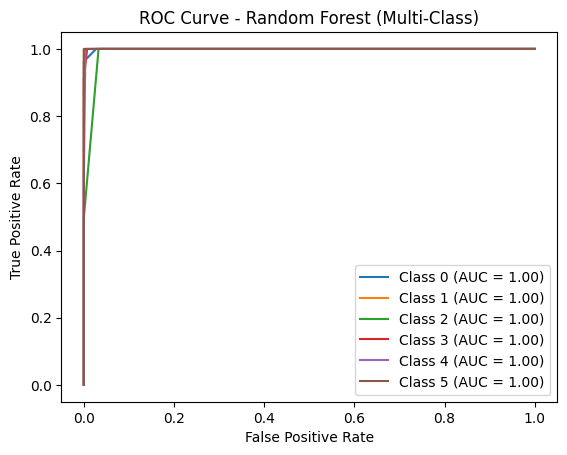

In [14]:
fpr = {}
tpr = {}
for i, class_label in enumerate(clf.classes_):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], rf_probs[:, i])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {rf_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multi-Class)')
plt.legend(loc='lower right')
plt.show()